<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/embeddings_enfoque_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Proyecto 3

### Procesado del Lenguaje Natural

**Pablo Martínez Olmos, Vanessa Gómez Verdejo, Emilio Parrado Hernández**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**  

**Integrantes del equipo: Nahúm Sanchez, Carlos Serrano, Fernando Villa**  

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

En este tercer proyecto, vamos a trabajar de nuevo con un conjunto reducido de entradas la base de datos [Quora Question Pairs](https://www.kaggle.com/c/quora-question-pairs/data), que incluye pares de preguntas etiquetadas como duplicadas. En esta ocasión vamos afrontar el problema de forma supervisada, entrenando un clasificador que, dadas dos preguntas a la entrada,  determine si son duplicadas o no. 


## Motivación: *information retrieval* utilizando redes neuronales
---

En [*information retrieval*](https://arxiv.org/pdf/1705.01509.pdf), a la hora de determinar si dos textos contienen la misma información (e.g. dos preguntas que son duplicadas), la estructura básica está compuesta por una estructura denominada [red siamesa (*siamese network*)](https://www.aclweb.org/anthology/R19-1116.pdf), en la que **entrenamos una red neuronal para combinar cada uno de los word embeddings de dos textos** sobre los cuales queremos determinar si contienen la misma información:

<img src='http://www.tsc.uc3m.es/~olmos/BBVA/IR.png' width=800 />

Para la base de datos [Quora Question Pairs](https://www.kaggle.com/c/quora-question-pairs/data), una red siamesa como la anterior alcanza un [accuracy de test en torno al 80%](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2761178.pdf).

### Mini-proyecto 3

En este pequeño proyecto, vamos a determinar el porcentaje de acierto que podemos alcanzar cuando simplemente promediamos los word embeddings por cada pregunta y concatenamos ambos vectores para alimentar un clasificador encargado de predecir si ambas preguntas son duplicadas o no. 


<img src='http://www.tsc.uc3m.es/~olmos/BBVA/IR2.png' width=800 />


In [ ]:
import pandas as pd

df = pd.read_csv("http://www.tsc.uc3m.es/~olmos/BBVA/QUORA_DUPLICATES.csv")

#df = pd.read_csv("QUORA_DUPLICATES.csv")

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,Where can I buy a Diamond?,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


> **Ejercicio 1 (1 punto):** Extraiga las primeras 5.000 entradas de la base de datos y estudie el desbalanceo entre clases. ¿Cual es el porcentaje de etiquetas correctas de un clasificador que siempre estime que las preguntas son distitnas?
>
> Separe el dataset en entrenamiento (80%) y test (20%).

In [ ]:
# YOUR CODE HERE
df_5000 = df.loc[:4999]
df_5000.shape

(5000, 6)

In [ ]:
df_5000.is_duplicate.value_counts(normalize=True)

0    0.6178
1    0.3822
Name: is_duplicate, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
df_5000.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(df_5000[['question1','question2']], df_5000['is_duplicate'], train_size=0.8,random_state=42)

<ipython-input-11-31e654d5d912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5000.dropna(inplace = True)


<Axes: >

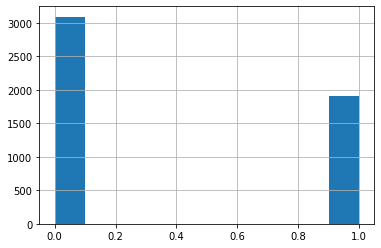

In [ ]:
df_5000.is_duplicate.hist()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
print(f"Un clasificador que siempre prediga que las preguntas son distintas acierta el {np.round(accuracy_score(y_train, np.zeros(len(y_train)))*100,2)} de las veces en train")
print(f"Un clasificador que siempre prediga que las preguntas son distintas acierta el {np.round(accuracy_score(y_test, np.zeros(len(y_test)))*100,2)} de las veces en test")

Un clasificador que siempre prediga que las preguntas son distintas acierta el 62.32 de las veces en train
Un clasificador que siempre prediga que las preguntas son distintas acierta el 59.6 de las veces en test


>**Ejercicio 2 (2 puntos)**: Vectorice las preguntas usando tanto TF-IDF como promedio de word embeddings. Concatene la representación de cada par de preguntas en el conjunto de entrenamiento y test.

In [ ]:
! pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 14.3 MB/s eta 0:00:00


In [ ]:
# YOUR CODE HERE
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
import string 
import contractions
nltk.download('stopwords')

lemmatizer  = WordNetLemmatizer()
stopwords_en   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation 

def normalize(text):
  text2 = contractions.fix(text).lower().translate(str.maketrans('#@','  ', string.punctuation)) # Arreglamos las contracciones 
  text_tokens = nltk.word_tokenize(text2) # Tokenizamos 
  normalized_text = [lemmatizer.lemmatize(t) for t in text_tokens if (t not in stopwords_en)] # lematización
  return normalized_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train['questions_norm'] = (X_train['question1'] +' '+X_train['question2']).apply(lambda x: normalize(x))
X_test['questions_norm'] = (X_test['question1'] +' '+X_test['question2']).apply(lambda x: normalize(x))
X_train.head()

,question1,question2,questions_norm
4227,Are men really better drivers than women?,Who are better drivers woman or man?,"[men, really, better, driver, woman, better, d..."
4676,Why are fruits so expensive in Japan?,What is Japan really like?,"[fruit, expensive, japan, japan, really, like]"
800,What are the safety precautions on handling sh...,What are the safety precautions on handling sh...,"[safety, precaution, handling, shotgun, propos..."
3671,Which is the best book for studying engineerin...,Which book is the best for study of Engineerin...,"[best, book, studying, engineering, mechanic, ..."
4193,Two equal masses hang one below the other on s...,What will b angle b/w two vector of equal magn...,"[two, equal, mass, hang, one, string, equal, l..."


In [ ]:
import gensim
D = gensim.corpora.Dictionary(X_train.questions_norm.values)
n_tokens = len(D)
no_below = 5 #Minimum number of documents to keep a term in the dictionary
no_above = .9 #Maximum proportion of documents in which a term can appear to be kept in the dictionary
D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)
print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 1382 terms
First terms in the dictionary:
0 : better
1 : driver
2 : man
3 : men
4 : really
5 : woman
6 : expensive
7 : japan
8 : like
9 : handling


## TF-IDF

In [ ]:
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense, corpus2csc

corpus_bow = [D.doc2bow(doc) for doc in X_train.questions_norm.values]
model = TfidfModel(corpus_bow)  
corpus_tfidf = model[corpus_bow]
n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert TFIDF representacion
corpus_tfidf_sparse_train = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
print(f"La dimensión de la matriz TF-IDF es {corpus_tfidf_sparse_train.shape[0]} x {corpus_tfidf_sparse_train.shape[1]}")

La dimensión de la matriz TF-IDF es 4000 x 1382


In [ ]:
corpus_bow = [D.doc2bow(doc) for doc in X_test.questions_norm.values]
model = TfidfModel(corpus_bow)  
corpus_tfidf = model[corpus_bow]
n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert TFIDF representacion
corpus_tfidf_sparse_test = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
print(f"La dimensión de la matriz TF-IDF test es {corpus_tfidf_sparse_test.shape[0]} x {corpus_tfidf_sparse_test.shape[1]}")

La dimensión de la matriz TF-IDF test es 1000 x 1382


## MEDIA WE

In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-29 13:16:12.727328: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 13:16:14.460519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 13:16:14.460692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")
list_processes = ["parser","ner"]

for l in list_processes:
    nlp.disable_pipe(l) 
    
nlp.add_pipe('sentencizer')

questions = [nlp(' '.join(c)) for c in X_train.questions_norm.values]

def normalize(doc):
    return [w for w in doc if not w.is_stop and w.has_vector and not w.is_punct]

# eliminamos stopping words, puntuaciones y tokens sin word embedding
norm_questions = [normalize(c) for c in questions]

# Pasamos a modo texto (como hacemos media de WE NO HACE FALTA LEMATIZAR!)
norm_questions_text = [[w.text.lower() for w in c] for c in norm_questions]

# Volvemos a crear una lista de objetos spacy.Doc y extraemos la media de los word embeddings ...
WE_train = np.array([c.vector for c in [nlp(' '.join(w)) for w in norm_questions_text]])

print(f"La dimensión de la matriz WE es {WE_train.shape[0]} x {WE_train.shape[1]}")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


La dimensión de la matriz WE es 4000 x 300


In [ ]:
questions = [nlp(' '.join(c)) for c in X_test.questions_norm.values]

# eliminamos stopping words, puntuaciones y tokens sin word embedding
norm_questions = [normalize(c) for c in questions]

# Pasamos a modo texto (como hacemos media de WE NO HACE FALTA LEMATIZAR!)
norm_questions_text = [[w.text.lower() for w in c] for c in norm_questions]

# Volvemos a crear una lista de objetos spacy.Doc y extraemos la media de los word embeddings ...
WE_test = np.array([c.vector for c in [nlp(' '.join(w)) for w in norm_questions_text]])

> **Ejercicio 3 (2.5 puntos)**: En cada caso, entrene un clasificador de tipo regresión logística utilizando a la entrada la concatenación de ambas preguntas. Valide el parámetro de regularización y determine el porcentaje de preguntas correctamente clasificadas.

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV

rango_C = np.logspace(-3, 3, 10)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^3, a 10^3.
diccionario_parametros = [{'C': rango_C}]   
nfold = 10 # Número de particiones train/validación

""" Ajusto C por validación cruzada
El optimizador por defecto ('lbfgs') no acepta regularización l1. 
Usamos 'liblinear' siguiendo las recomendaciones de la librería.
"""
LR_with_CV_tfidf  = GridSearchCV(estimator=LR(penalty='l1',max_iter=int(3e3),solver='liblinear'),
                                  param_grid=diccionario_parametros,cv=nfold)
# Entrenar el modelo
LR_with_CV_tfidf.fit(corpus_tfidf_sparse_train,y_train)   

print("El mejor parámetro C es {0:.2f}".format(LR_with_CV_tfidf.best_params_['C']))
                        
# Score de claisficación en train/test
accuracy_train = LR_with_CV_tfidf.score(corpus_tfidf_sparse_train,y_train)   
accuracy_test = LR_with_CV_tfidf.score(corpus_tfidf_sparse_test,y_test)  

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))

El mejor parámetro C es 2.15
Accuracy train 78.75%. Accuracy test 65.40%

CPU times: user 3.45 s, sys: 13.5 ms, total: 3.46 s
Wall time: 5.56 s


Podemos notar que nuestro primer modelo es mejor que el baseline, sin embargo tiene sobreajuste

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(WE_train)   

W_train = transformer.transform(WE_train)
W_test = transformer.transform(WE_test)

rango_C = np.logspace(-3, 3, 10)  # Rango C en escala logarítmica (base 10). Esto es, 10 puntos desde 10^3, a 10^3.
diccionario_parametros = [{'C': rango_C}]   
nfold = 10 # Número de particiones train/validación

""" Ajusto C por validación cruzada
El optimizador por defecto ('lbfgs') no acepta regularización l1. 
Usamos 'liblinear' siguiendo las recomendaciones de la librería.
"""
LR_with_CV_WE  = GridSearchCV(estimator=LR(penalty='l1',max_iter=int(2e3),solver='liblinear'),
                                  param_grid=diccionario_parametros,cv=nfold)
# Entrenar el modelo
LR_with_CV_WE.fit(W_train,y_train)   

print("El mejor parámetro C es {0:.2f}".format(LR_with_CV_WE.best_params_['C']))
                        
# Score de claisficación en train/test
accuracy_train = LR_with_CV_WE.score(W_train,y_train)   
accuracy_test = LR_with_CV_WE.score(W_test,y_test)  

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))

El mejor parámetro C es 0.10
Accuracy train 70.88%. Accuracy test 66.70%



Podemos notar que nuestro modelo utilizando WE al igual que TF-IDF es mejor que el baseline, sin embargo observamos que RL con WE apesar de tener un accuracy mas bajo que TF-IDF, tiene un menor sobreajuste

>**Ejercicio 4 (2 puntos):** Dibuje la curva ROC de ambos clasificadores y determine el área bajo la curva.

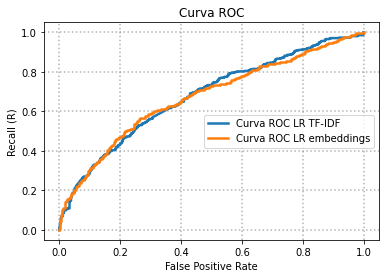

El área bajo la curva ROC de TF-IDF es 0.6761931855937272
El área bajo la curva ROC de embeddings es 0.6719715595720646


In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn import metrics
fpr, recall, thresholds = metrics.roc_curve(y_test, LR_with_CV_tfidf.predict_proba(corpus_tfidf_sparse_test)[:,1], pos_label=1) 
fpr2, recall2, thresholds = metrics.roc_curve(y_test, LR_with_CV_WE.predict_proba(WE_test)[:,1], pos_label=1) 

fig,ax = plt.subplots()
plt.plot(fpr,recall,lw=2.5,label='Curva ROC LR TF-IDF')
plt.plot(fpr2,recall2,lw=2.5,label='Curva ROC LR embeddings')
plt.legend(loc=7)
plt.grid(True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (R)')
plt.title('Curva ROC')
plt.show()

area_roc_tf_idf = metrics.roc_auc_score(y_test, LR_with_CV_tfidf.predict_proba(corpus_tfidf_sparse_test)[:,1])
area_roc_embbedings = metrics.roc_auc_score(y_test, LR_with_CV_WE.predict_proba(W_test)[:,1])

print(f"El área bajo la curva ROC de TF-IDF es {area_roc_tf_idf}")
print(f"El área bajo la curva ROC de embeddings es {area_roc_embbedings}")

>**Ejercicio 5 (2.5 puntos):** Repita los dos ejercicios anteriores entrenando en este caso un k-NN y la distancia coseno (para ello normalice for filas las matrices `W`,`C`). Valide el número de vecinos y la ponderación de las distancias. ¿Mejoran los resultados?


In [ ]:
#Train TF-IDF
import scipy
norms = scipy.sparse.linalg.norm(corpus_tfidf_sparse_train, axis=1)
norms[norms<1e-6] = 1e-6
corpus_tfidf_train_norm = np.asarray(corpus_tfidf_sparse_train/norms.reshape([-1,1]))

norms = scipy.sparse.linalg.norm(corpus_tfidf_sparse_test,axis=1)
norms[norms<1e-6] = 1e-6
corpus_tfidf_test_norm = np.asarray(corpus_tfidf_sparse_test/norms.reshape([-1,1]))

# Train WE
norms = np.linalg.norm(W_train,axis=1)
norms[norms<1e-6] = 1e-6
WE_train_norm = W_train/norms.reshape([-1,1])

# Test
norms = np.linalg.norm(W_test,axis=1)
norms[norms<1e-6] = 1e-6
WE_test_norm = W_test/norms.reshape([-1,1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento k-NN con validación de vecinos y ponderación de distancias
K_max = 15
rango_K = np.arange(1, K_max+1)
nfold = 10
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]

# Validación cruzada con GridSearchCV
knn_tfidf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
knn_tfidf.fit(corpus_tfidf_train_norm, y_train)
# Test
accuracy_train_knn = knn_tfidf.score(corpus_tfidf_train_norm,y_train)
accuracy_test_knn = knn_tfidf.score(corpus_tfidf_test_norm,y_test)
print(f"El número de vecinos seleccionado es k={knn_tfidf.best_params_['n_neighbors']}")
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de vecinos seleccionado es k=14
Accuracy train 74.95%. Accuracy test 65.40%



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento k-NN con validación de vecinos y ponderación de distancias
K_max = 15
rango_K = np.arange(1, K_max+1)
nfold = 10
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]

# Validación cruzada con GridSearchCV
knn_we = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
knn_we.fit(WE_train_norm, y_train)
# Test
accuracy_train_knn = knn_we.score(WE_train_norm,y_train)
accuracy_test_knn = knn_we.score(WE_test_norm,y_test)

print(f"El número de vecinos seleccionado es k={knn_we.best_params_['n_neighbors']}")
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de vecinos seleccionado es k=15
Accuracy train 99.92%. Accuracy test 66.00%



Respecto a los modelos con KNN, podemos observar que tienen un mejor desempeño que con RL, teniendo un mejor desempeño con WE, pero un sobreajuste muy alto

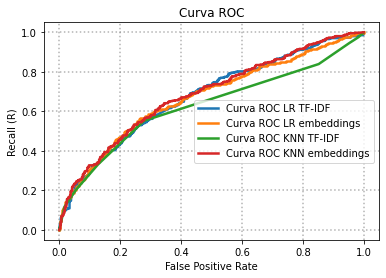

El área bajo la curva ROC de LR TF-IDF es 0.6761931855937272
El área bajo la curva ROC de LR embeddings es 0.6743554388995946
El área bajo la curva ROC de KNN TF-IDF es 0.6277057445677453
El área bajo la curva ROC de KNN embeddings es 0.6848773174297296


In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn import metrics
fpr, recall, thresholds = metrics.roc_curve(y_test, LR_with_CV_tfidf.predict_proba(corpus_tfidf_sparse_test)[:,1], pos_label=1) 
fpr2, recall2, thresholds = metrics.roc_curve(y_test, LR_with_CV_WE.predict_proba(WE_test)[:,1], pos_label=1) 

fpr3, recall3, thresholds = metrics.roc_curve(y_test, knn_tfidf.predict_proba(corpus_tfidf_test_norm)[:,1], pos_label=1) 
fpr4, recall4, thresholds = metrics.roc_curve(y_test, knn_we.predict_proba(WE_test_norm)[:,1], pos_label=1) 


fig,ax = plt.subplots()
plt.plot(fpr,recall,lw=2.5,label='Curva ROC LR TF-IDF')
plt.plot(fpr2,recall2,lw=2.5,label='Curva ROC LR embeddings')
plt.plot(fpr3,recall3,lw=2.5,label='Curva ROC KNN TF-IDF')
plt.plot(fpr4,recall4,lw=2.5,label='Curva ROC KNN embeddings')
plt.legend(loc=7)
plt.grid(True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (R)')
plt.title('Curva ROC')
plt.show()

area_roc_lr_tfidf = metrics.roc_auc_score(y_test, LR_with_CV_tfidf.predict_proba(corpus_tfidf_sparse_test)[:,1])
area_roc_lr_embbedings = metrics.roc_auc_score(y_test, LR_with_CV_WE.predict_proba(WE_test)[:,1])

area_roc_knn_tfidf = metrics.roc_auc_score(y_test, knn_tfidf.predict_proba(corpus_tfidf_test_norm)[:,1])
area_roc_knn_embbedings = metrics.roc_auc_score(y_test, knn_we.predict_proba(WE_test_norm)[:,1])

print(f"El área bajo la curva ROC de LR TF-IDF es {area_roc_lr_tfidf}")
print(f"El área bajo la curva ROC de LR embeddings es {area_roc_lr_embbedings}")
print(f"El área bajo la curva ROC de KNN TF-IDF es {area_roc_knn_tfidf}")
print(f"El área bajo la curva ROC de KNN embeddings es {area_roc_knn_embbedings}")